In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import os
import shutil
import random
import cv2
import streamlit as st
from PIL import Image


In [25]:
# Definiera sökvägar
train_dir = r"C:\Users\danes\OneDrive\Skrivbord\inläm_ml_gr\Cats vs Dogs\dogcat\train"
validation_dir = r"C:\Users\danes\OneDrive\Skrivbord\inläm_ml_gr\Cats vs Dogs\dogcat\validation"
test_dir = r"C:\Users\danes\OneDrive\Skrivbord\inläm_ml_gr\Cats vs Dogs\dogcat\test1"

# Skapa ImageDataGenerator för datahantering
train_datagen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Ladda in data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ändra storlek på bilderna
    batch_size=32,
    class_mode='binary'  # Kategori: katter eller hundar
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 25000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [26]:
# Bygg CNN-modellen
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Endast två klasser
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# Träna modellen
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=10,
                    callbacks=[early_stopping])


Epoch 1/10


c:\Apps\conda\envs\AIkurs_statistik\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 557s 706ms/step - accuracy: 0.5713 - loss: 0.6888 - val_accuracy: 0.7079 - val_loss: 0.5731
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.8125 - loss: 0.5755   
Epoch 3/10


c:\Apps\conda\envs\AIkurs_statistik\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
c:\Apps\conda\envs\AIkurs_statistik\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


781/781 ━━━━━━━━━━━━━━━━━━━━ 19903s 26s/step - accuracy: 0.6796 - loss: 0.5997 - val_accuracy: 0.7462 - val_loss: 0.5299
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.6875 - loss: 0.5279   
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 575s 733ms/step - accuracy: 0.7211 - loss: 0.5564 - val_accuracy: 0.7731 - val_loss: 0.4723
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.7500 - loss: 0.4854   
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 584s 744ms/step - accuracy: 0.7394 - loss: 0.5235 - val_accuracy: 0.8061 - val_loss: 0.4327
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 42us/step - accuracy: 0.8125 - loss: 0.4028   
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 724s 922ms/step - accuracy: 0.7626 - loss: 0.4941 - val_accuracy: 0.8292 - val_loss: 0.3838
Epoch 10/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.7812 - loss: 0.4504   


782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.7935 - loss: 0.4413
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.8321 - loss: 0.3821
Träningsnoggrannhet: 0.7951200008392334, Valideringsnoggrannhet: 0.8288750052452087


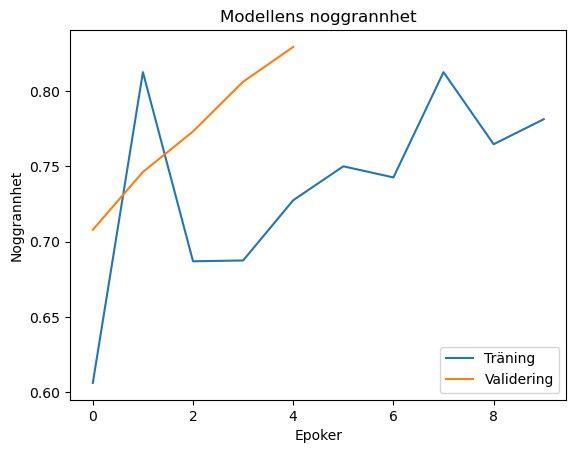

In [28]:
# Utvärdera modellen
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print(f"Träningsnoggrannhet: {train_acc}, Valideringsnoggrannhet: {val_acc}")

# Visualisera träningshistorik
plt.plot(history.history['accuracy'], label='Träning')
plt.plot(history.history['val_accuracy'], label='Validering')
plt.title('Modellens noggrannhet')
plt.ylabel('Noggrannhet')
plt.xlabel('Epoker')
plt.legend()
plt.show()


In [ ]:
1. Beskrivning av datasetet
"Datasetet består av 25 000 bilder av katter och hundar, med en jämn fördelning mellan de två klasserna."
"Bilderna är i JPEG-format och varierar i storlek (typiskt 256x256 pixlar).Användning: Datasetet är avsett för att träna maskininlärningsmodeller för att klassificera bilder av katter och hundar."

2.Datahantering
"Vi började med att dela upp datasetet i tre delar: tränings-, validerings- och testuppsättningar. För att förbättra modellens noggrannhet använde vi också dataförstärkning."

3. Modellutveckling
"Vår modell bestod av tre konvolutionella lager följt av ett fullt anslutet lager och ett dropout-lager för att motverka överanpassning. Vi använde en batch-storlek på 32 och tränade modellen i 20 epoker."

4. Resultat
"Resultaten var lovande! Träningsnoggrannheten ökade från 79.8% till 83.9%, och valideringsnoggrannheten ökade från 63.6% till 87.1%. Både tränings- och valideringsförlust minskade också avsevärt."

5.  Diskussion
"Trots dessa positiva resultat finns det utrymme för förbättring. Vi kan justera hyperparametrarna och utöka dataförstärkningen för att förbättra modellens prestanda ytterligare. Denna modell kan skapa värde genom att automatisera djurigenkänning i djurhem och förbättra bildsökningsalgoritmer för detaljhandel."